In [ ]:
#training script from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 300, 300

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Found 157 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
125/125 [==============================] - 208s 2s/step - loss: 0.7064 - acc: 0.6012 - val_loss: 0.8796 - val_acc: 0.5030
Epoch 2/20
125/125 [==============================] - 225s 2s/step - loss: 0.6420 - acc: 0.6288 - val_loss: 1.0363 - val_acc: 0.5000
Epoch 3/20
125/125 [==============================] - 226s 2s/step - loss: 0.5784 - acc: 0.6939 - val_loss: 1.4004 - val_acc: 0.4970
Epoch 4/20
125/125 [==============================] - 256s 2s/step - loss: 0.5156 - acc: 0.7378 - val_loss: 1.0110 - val_acc: 0.4271
Epoch 5/20
125/125 [==============================] - 225s 2s/step - loss: 0.4432 - acc: 0.7778 - val_loss: 1.8427 - val_acc: 0.5030
Epoch 6/20
125/125 [==============================] - 209s 2s/step - loss: 0.3871 - acc: 0.8167 - val_loss: 2.0200 - val_acc: 0.5226
Epoch 7/20
125/125 [==============================] - 209s 2s/step - loss: 0.3100 - acc: 0.8579 - val_loss: 2.2853 - val_

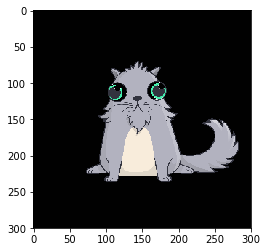

[[1]] [[1.]]
This is a good kitty.


In [73]:
# from keras.models import load_model
# from keras.preprocessing.image import img_to_array, load_img

# model = load_model('first_try.h5')
import numpy as np
import matplotlib.pyplot as plt


img = load_img('data/validation/criminal/17879300.png',False,target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
probs = model.predict_proba(x)
image = 255 - img_to_array(img)

plt.imshow(image)
plt.show()

if(int(preds) == 0):
    print(preds, probs)
    print("CRIMINAL KITTY")
else:
    print(preds, probs)
    print("This is a good kitty.")
